In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.covariance import MinCovDet
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, f, chi2
%matplotlib inline

$\textbf{Empirical Exercise-Week 10}$  International evidence on productivity and growth. File: ces.sv. Text: p. 673, 15. 23

In [2]:
Tab1 = pd.read_csv('ces.csv')
Tab1.iloc[0,:]

code        1.000000e+00
year        1.960000e+03
y           8.460000e+10
k           1.620000e+11
l           3.556000e+06
e           7.350000e+00
ly          2.516130e+01
lk          2.581086e+01
ll          1.508415e+01
variabl0    1.994700e+00
hl          2.610000e+07
lhl         1.707885e+01
t           1.000000e+00
lyl         1.007715e+01
lkl         1.072672e+01
lkl2        1.150624e+02
d1          1.000000e+00
d2          0.000000e+00
d3          0.000000e+00
d4          0.000000e+00
d5          0.000000e+00
d6          0.000000e+00
d7          0.000000e+00
d8          0.000000e+00
d9          0.000000e+00
d10         0.000000e+00
d11         0.000000e+00
d12         0.000000e+00
d13         0.000000e+00
d14         0.000000e+00
d15         0.000000e+00
d16         0.000000e+00
d17         0.000000e+00
d18         0.000000e+00
d19         0.000000e+00
d20         0.000000e+00
d21         0.000000e+00
d22         0.000000e+00
d23         0.000000e+00
d24         0.000000e+00


In [13]:
ly = np.array(Tab1.iloc[:,6]); lk = np.array(Tab1.iloc[:,7]); ll = np.array(Tab1.iloc[:,8])

In [14]:
trend1 =  np.array(range(1, 29))
trend  = np.kron(np.ones(82),trend1)

xx = np.array([np.ones(2296), lk, ll]).T; yy = ly
results1 = sm.OLS(yy,xx).fit()
[results1.params, results1.tvalues]

[array([0.37869971, 0.86238313, 0.13726957]),
 array([  3.85300922, 176.91471933,  20.08362411])]

We see the production coefficients, with .86 on capital, .13 on labor
Do these addup to unity? Use the tstat

In [15]:
SIGMAB = np.linalg.inv(xx.T.dot(xx)) * np.sum(results1.resid**2)/(len(xx)-3)
Tstat1 = results1.params[1] + results1.params[2] - 1
Tstat2 = SIGMAB[1,1]+ SIGMAB[2,2] + 2 * SIGMAB[1,2]
Tstat3 = np.sqrt(Tstat2)
TSTAT = Tstat1/Tstat3
dgf = len(xx)-3
Tprob = t.cdf(TSTAT,dgf)
(1 - Tprob)

0.525858138210839

We cannot reject the null hypothesis that the coefficients add up to unity.

In [16]:
xxx = np.array([np.ones(2296), lk, ll, trend]).T; yy = ly;
results2 = sm.OLS(yy,xxx).fit()
[results2.params, results2.tvalues]

[array([ 0.29947172,  0.8742899 ,  0.13508103, -0.01213207]),
 array([  3.14644934, 182.088847  ,  20.44550142, -12.79259568])]

Trend term does not have much effect on coefficients of labor and capital

In [17]:
lyl = ly - ll
lkl = lk - ll
xxx = np.array([np.ones(2296), lkl, trend]).T; yyy = lyl
results3 = sm.OLS(yyy,xxx).fit()
[results3.params, results3.tvalues]

[array([ 0.45297586,  0.87313408, -0.01188515]),
 array([ 10.91032719, 183.4227077 , -12.66051615])]

Coefficient of capital/labor ratio not much different from capital coefficient

In [ ]:
from linearmodels.panel import PanelOLS
from linearmodels import RandomEffects
help(PanelOLS)

<BarContainer object of 82 artists>

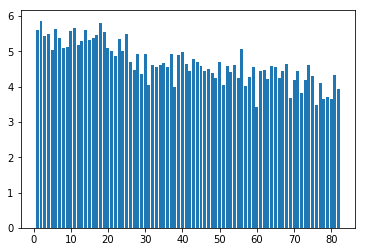

In [20]:
code = np.array(Tab1.iloc[:,0])
year=np.array(Tab1.iloc[:,1])
data = pd.DataFrame({'yy': yy, 'lk': lk, 'll': ll,'code':code,'year':year})
data=data.set_index(['code','year'])
mod = PanelOLS(data.yy, data[['lk', 'll']], entity_effects=True)  # fixed effects estimation
results3 = mod.fit()

labels=list(results3.estimated_effects.index.levels[0])
effects=[]
for i in labels:
    effects.append(float(results3.estimated_effects.loc[i,:].iloc[0,:]))
plt.bar(labels,effects)

In [21]:
Dummy = np.array(Tab1.iloc[:,18:])

In [22]:
xx = np.hstack([np.ones((2296,1)), lk.reshape(-1,1), ll.reshape(-1,1), Dummy]); yy = ly;
results4 = sm.OLS(yy,xx).fit()
np.set_printoptions(precision=4,suppress=True)
np.array([results4.params, results4.tvalues]).T # using dummies for each year

array([[  0.2469,   2.5051],
       [  0.8741, 181.4531],
       [  0.1352,  20.4055],
       [ -0.0159,  -0.3283],
       [ -0.0116,  -0.2397],
       [ -0.0143,  -0.295 ],
       [ -0.0194,  -0.4009],
       [ -0.03  ,  -0.618 ],
       [ -0.0504,  -1.0393],
       [ -0.0521,  -1.0731],
       [ -0.0473,  -0.9752],
       [ -0.0488,  -1.0058],
       [ -0.06  ,  -1.2361],
       [ -0.0646,  -1.3293],
       [ -0.0733,  -1.5093],
       [ -0.0916,  -1.8845],
       [ -0.1279,  -2.6322],
       [ -0.1334,  -2.7438],
       [ -0.147 ,  -3.0228],
       [ -0.164 ,  -3.3698],
       [ -0.1688,  -3.4679],
       [ -0.1958,  -4.0221],
       [ -0.2257,  -4.6337],
       [ -0.2566,  -5.2657],
       [ -0.2754,  -5.6495],
       [ -0.2811,  -5.7662],
       [ -0.2884,  -5.9137],
       [ -0.2889,  -5.9217],
       [ -0.2862,  -5.8658]])

In [23]:
results4.rsquared

0.9656130459860399

To test the differences between the fixed and the pooled regression do an F test. We thus test to see if the individual country differences matter

In [24]:
results_fixed =results3 #fixed effects estimation
results_pooled=results1 #pooled restricted model
SSR_pooled = results_pooled.mse_resid
SSR_fixed = results3.resid_ss/2296
[SSR_pooled, SSR_fixed]

[0.13678833335114943, 0.015027837186911744]

In [31]:
Fnum = (SSR_pooled-SSR_fixed)/82;
Fdenom = SSR_fixed/(results_fixed.nobs-84);
Fstat = Fnum/Fdenom;
Fprob =  f.cdf(Fstat, 82, results_fixed.nobs-84);
1-Fprob

1.1102230246251565e-16